In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
class CustomNaiveBayes:
    def __init__(self):
        self.class_prior_ = None
        self.feature_log_prob_ = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))        
        self.class_prior_ = np.zeros(n_classes)
        self.feature_log_prob_ = np.zeros((n_classes, n_features))
        
        
        for c in range(n_classes):
            self.class_prior_[c] = np.sum(y == c) / n_samples
            class_samples = X[y == c]
            self.feature_log_prob_[c] = np.log((np.sum(class_samples, axis=0) + 1) / (np.sum(class_samples) + n_features))
    
    def predict(self, X):
        posterior = np.dot(X, self.feature_log_prob_.T) + np.log(self.class_prior_)
        return np.argmax(posterior, axis=1)

In [3]:
# Load the datasets
true_data = pd.read_csv('processedTrue.csv')
fake_data = pd.read_csv('processedFake.csv')

In [4]:
# Concatenate the datasets
data = pd.concat([true_data, fake_data], ignore_index=True, sort=False)

# Rename the columns
data.columns = ['index', 'label', 'content']

In [5]:
# Extract features and labels
X = data['content']
y = data['label']

In [6]:
# Splitting the data into training and testing sets
# Assuming 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Vectorizing the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
# Create an instance of the CustomNaiveBayes classifier
custom_nb_classifier = CustomNaiveBayes()

# Train the classifier
custom_nb_classifier.fit(X_train_vectorized.toarray(), y_train)

In [9]:
# Predict on the test set
y_pred = custom_nb_classifier.predict(X_test_vectorized.toarray())

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9336007130124777


In [11]:
# Predict on the training set
X_train_prediction = custom_nb_classifier.predict(X_train_vectorized.toarray())

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, X_train_prediction)
print('Training Accuracy:', training_accuracy)

# Predict on the test set
X_test_prediction = custom_nb_classifier.predict(X_test_vectorized.toarray())

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, X_test_prediction)
print('Testing Accuracy:', testing_accuracy)


print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9404751956770007
Testing Accuracy: 0.9336007130124777
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      4317
           1       0.93      0.95      0.94      4659

    accuracy                           0.93      8976
   macro avg       0.93      0.93      0.93      8976
weighted avg       0.93      0.93      0.93      8976



In [12]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[3975  342]
 [ 254 4405]]


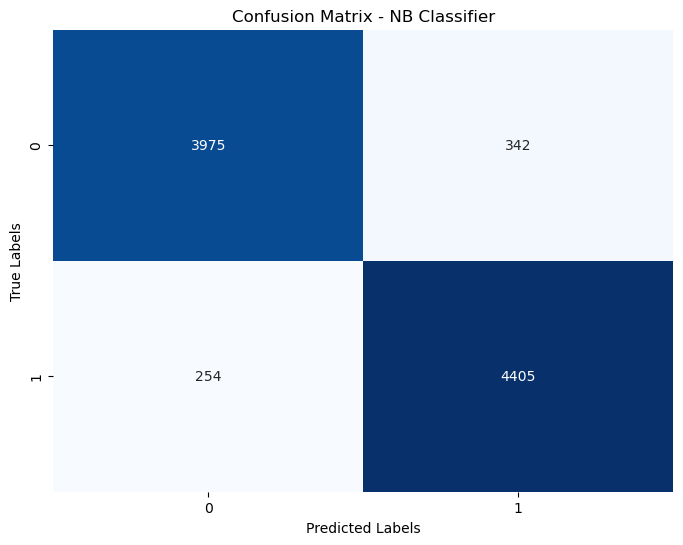

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - NB Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()